In [17]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PythonCapstoneData/Demographic_Data_Orig.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,full.name,ip.address,region,in.store,age,items,amount
0,0,Carter Stokes,NaN,2,0,37,4,281.03
1,1,Jacob Jerde,NaN,2,0,35,2,219.51
2,2,Tressa Ratke,192.90.208.202,4,1,45,3,1525.70
3,3,Rudolf Abshire,251.55.128.164,3,1,46,3,715.25
4,4,Theresa Davis,182.19.192.186,1,1,33,4,1937.50
...,...,...,...,...,...,...,...,...
79995,79995,Hien Kertzmann,17.5.218.127,1,1,71,3,558.82
79996,79996,Celsa Nikolaus,NaN,3,0,59,7,1932.00
79997,79997,Noel Jewess,NaN,2,0,54,1,414.16
79998,79998,Mallie Schaden,142.236.73.247,1,1,49,4,335.32


# Objective
##### I want to analyze various aspects of this dataset, such as shopping trends based on age and region, and spending habits of online vs in-store shoppers.
##### Ultimately I hope for this analysis to further inform business decisions regarding advertising.

In [18]:
# this data is clean as a whistle
# the only null values are in the ip address column, which appears to be the half that shopped in-store
# i will also infer the 1 boolean value (in store column) actually means online, not in store since they have ip address
df.isnull().sum()

index             0
full.name         0
ip.address    40000
region            0
in.store          0
age               0
items             0
amount            0
dtype: int64

In [19]:
# my suspicions were correct, this dataset contains an equal amount of online and in-store shoppers
# i'll move forward assuming this was intentional (meaning i can't compare which is more common organically)
df.loc[df['in.store'] == 0].count()

index         40000
full.name     40000
ip.address        0
region        40000
in.store      40000
age           40000
items         40000
amount        40000
dtype: int64

In [20]:
# i'm going to drop the ip address column since i won't be using it
df.drop('ip.address', axis=1)

,index,full.name,region,in.store,age,items,amount
0,0,Carter Stokes,2,0,37,4,281.03
1,1,Jacob Jerde,2,0,35,2,219.51
2,2,Tressa Ratke,4,1,45,3,1525.70
3,3,Rudolf Abshire,3,1,46,3,715.25
4,4,Theresa Davis,1,1,33,4,1937.50
...,...,...,...,...,...,...,...
79995,79995,Hien Kertzmann,1,1,71,3,558.82
79996,79996,Celsa Nikolaus,3,0,59,7,1932.00
79997,79997,Noel Jewess,2,0,54,1,414.16
79998,79998,Mallie Schaden,1,1,49,4,335.32


In [21]:
# separating in-store and online customers
in_store_purchase = df.loc[df['in.store'] == 0]
online_purchase = df.loc[df['in.store'] == 1]

In [22]:
# then i further divide it between 4 different age groups
# i picked these ranges myself and somehow in-store 21-39 and 40-59 had the exact same amount lol
store_age_under_21 = in_store_purchase.loc[in_store_purchase['age'] < 21]['index'].count()
store_age_21_to_39 = in_store_purchase[(in_store_purchase['age'] >= 21) & (in_store_purchase['age'] < 40)]['index'].count()
store_age_40_to_59 = in_store_purchase[(in_store_purchase['age'] >= 40) & (in_store_purchase['age'] < 60)]['index'].count()
store_age_60_plus = in_store_purchase.loc[in_store_purchase['age'] >= 60]['index'].count()

online_age_under_21 = online_purchase.loc[online_purchase['age'] < 21]['index'].count()
online_age_21_to_39 = online_purchase[(online_purchase['age'] >= 21) & (online_purchase['age'] < 40)]['index'].count()
online_age_40_to_59 = online_purchase[(online_purchase['age'] >= 40) & (online_purchase['age'] < 60)]['index'].count()
online_age_60_plus = online_purchase.loc[online_purchase['age'] >= 60]['index'].count()

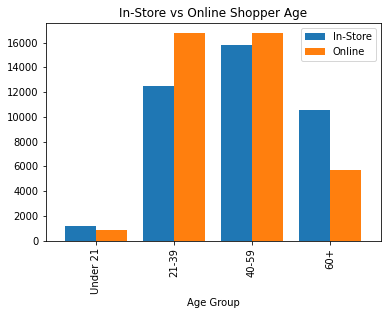

In [23]:
# here's a simple visualization
# couldn't figure out how to enter previous variables so it's hardcoded...
age = pd.DataFrame({
    'Age Group': ['Under 21', '21-39', '40-59', '60+'],
    'In-Store': [1138, 12492, 15803, 10567],
    'Online': [837, 16738, 16738, 5687]
})

age.plot(title='In-Store vs Online Shopper Age',x='Age Group', y=['In-Store', 'Online'], kind='bar', width=0.8)

##### As we can observe, customers between the ages of 21 and 59 prefer online shopping, while customers under 21 and over 60 prefer shopping in-store. There is a particularly large discrepancy in the 60+ age group.

In [24]:
# now i'm going to compare who spends more
store_sales = in_store_purchase['amount'].sum()
online_sales = online_purchase['amount'].sum()

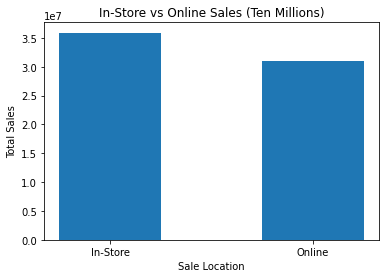

In [26]:
# another hardcoded visualization, this time using numpy
x = np.array(['In-Store', 'Online'])
y = np.array([35902788, 30970785])

plt.title('In-Store vs Online Sales (Ten Millions)')
plt.ylabel('Total Sales')
plt.xlabel('Sale Location')

plt.bar(x,y,width=0.5)
plt.show()

##### Our sample shows that in-store shoppers spent more money than online shoppers. It could be because online shopping allows you time to think and make more informed decisions, as well as provide you with other options. Shoppers might be more inclined to buy things on a whim while shopping in-store.

In [27]:
# i will now separate by region, of which there are 4
df['region'].groupby(df['region']).count()

region
1    16000
2    20000
3    18000
4    26000
Name: region, dtype: int64

In [28]:
region1_in_store = in_store_purchase.loc[in_store_purchase['region'] == 1]['index'].count()
region2_in_store = in_store_purchase.loc[in_store_purchase['region'] == 2]['index'].count()
region3_in_store = in_store_purchase.loc[in_store_purchase['region'] == 3]['index'].count()
region4_in_store = in_store_purchase.loc[in_store_purchase['region'] == 4]['index'].count()

region1_online = online_purchase.loc[online_purchase['region'] == 1]['index'].count()
region2_online = online_purchase.loc[online_purchase['region'] == 2]['index'].count()
region3_online = online_purchase.loc[online_purchase['region'] == 3]['index'].count()
region4_online = online_purchase.loc[online_purchase['region'] == 4]['index'].count()

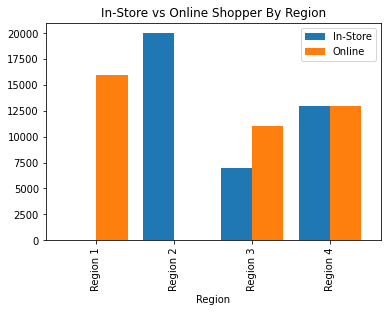

In [29]:
# and with this visualization we can see the shopping tendencies of each region
# i don't know why they made this synthetic data look so clearly artificial
region = pd.DataFrame({
    'Region': ['Region 1', 'Region 2', 'Region 3', 'Region 4'],
    'In-Store': [0, 20000, 7001, 12999],
    'Online': [16000, 0, 10999, 13001]
})

region.plot(title='In-Store vs Online Shopper By Region',x='Region', y=['In-Store', 'Online'], kind='bar', width=0.8)

##### Region 1 customers do all of their shopping online, suggesting there may not be a local store branch.
#####Region 2 does all of their shopping in-store for unexplained reasons. This is great since we know people spend more money shopping in person.
##### Region 3 has the most natural looking data: customers prefer shopping online but there are still a healthy amount coming in to the store.
##### Region 4 has an equal amount of customers purchasing from the store and online.

In [30]:
# and we'll also look at which region spends the most
region1_store_sales = in_store_purchase.loc[in_store_purchase['region'] == 1]['amount'].sum()
region2_store_sales = in_store_purchase.loc[in_store_purchase['region'] == 2]['amount'].sum()
region3_store_sales = in_store_purchase.loc[in_store_purchase['region'] == 3]['amount'].sum()
region4_store_sales = in_store_purchase.loc[in_store_purchase['region'] == 4]['amount'].sum()

region1_online_sales = online_purchase.loc[online_purchase['region'] == 1]['amount'].sum()
region2_online_sales = online_purchase.loc[online_purchase['region'] == 2]['amount'].sum()
region3_online_sales = online_purchase.loc[online_purchase['region'] == 3]['amount'].sum()
region4_online_sales = online_purchase.loc[online_purchase['region'] == 4]['amount'].sum()

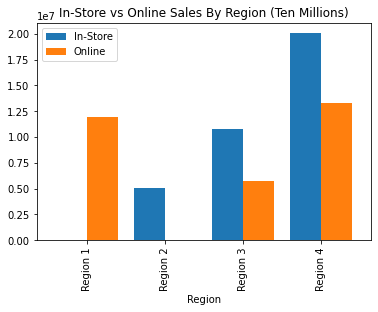

In [31]:
# quick lil visualization
region_sales = pd.DataFrame({
    'Region': ['Region 1', 'Region 2', 'Region 3', 'Region 4'],
    'In-Store': [0, 5042183, 10793540, 20067063],
    'Online': [11922583, 0, 5729913, 13318288]
})

region_sales.plot(title='In-Store vs Online Sales By Region (Ten Millions)',x='Region', y=['In-Store', 'Online'], kind='bar', width=0.8)

##### Region 4 is by far the largest spender, both in-store and online. Region 3 presents similar results on a smaller scale.

# Conclusion
##### According to my analysis, which is admittedly shallow, the store's core demographic for online shoppers are customers age 21 to 59 in Region 1, followed by Region 4.
##### The store generates slightly more revenue from in-person shopping, so they may want to target the 60+ demographic for advertising, especially in Regions 3 and 4.
##### The store doesn't need to bother advertising to the under 21 demographic.
##### The data shows that where there is demand for products online, there are customers willing to shop in-store. It would be lucrative to open a store in Region 1 (assuming there isn't already).